# 可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [3]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


--2023-06-12 10:32:28--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  21.6MB/s    用时 0.4s    

2023-06-12 10:32:29 (21.6 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



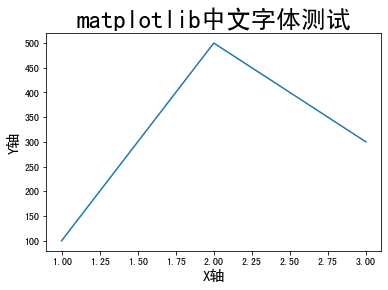

In [4]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [1]:
import os
os.chdir('../mmsegmentation')

In [2]:
os.getcwd()

'/mnt/openmmlab-Camp/04-mmsegmentation-tutorial/mmsegmentation'

## 导入工具包

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [4]:
# 日志文件路径
log_path = 'work_dirs/DubaiDataset/20230613_092225/vis_data/scalars.json'

In [5]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [6]:
len(json_list)

38

In [7]:
eval(json_list[4])

{'lr': 0.009911076035273796,
 'data_time': 0.008344745635986328,
 'loss': 0.07958898358047009,
 'decode.loss_ce': 0.056251656264066696,
 'decode.acc_seg': 71.1639404296875,
 'aux.loss_ce': 0.02333732694387436,
 'aux.acc_seg': 71.905517578125,
 'time': 0.6431587219238282,
 'memory': 3614,
 'step': 400}

In [8]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

/tmp/ipykernel_2132/3904868096.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(eval(each), ignore_index=True)
/tmp/ipykernel_2132/3904868096.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(eval(each), ignore_index=True)
/tmp/ipykernel_2132/3904868096.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(eval(each), ignore_index=True)
/tmp/ipykernel_2132/3904868096.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train.append(eval(each), ignore_index=True)
/tmp/ipykernel_2132/3904868096.py:7: FutureWarning: The frame.append method is d

In [9]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,memory,step
0,0.009998,0.012377,0.148091,0.106395,44.296265,0.041696,43.847656,1.597458,6130.0,8.0
1,0.009978,0.008306,0.106877,0.075714,72.549438,0.031164,75.521851,0.640301,3614.0,100.0
2,0.009956,0.008099,0.099064,0.070930,61.618042,0.028134,55.010986,0.641545,3614.0,200.0
3,0.009933,0.007943,0.092462,0.065484,54.470825,0.026979,48.934937,0.641942,3614.0,300.0
4,0.009911,0.008345,0.079589,0.056252,71.163940,0.023337,71.905518,0.643159,3614.0,400.0
5,0.009889,0.007737,0.084259,0.059813,66.574097,0.024447,69.064331,0.642461,5769.0,500.0
6,0.009866,0.008211,0.078853,0.056025,47.686768,0.022827,50.909424,0.642598,3614.0,600.0
7,0.009844,0.008622,0.084853,0.060646,62.634277,0.024207,63.989258,0.643270,3614.0,700.0
8,0.009822,0.007685,0.074650,0.053156,53.448486,0.021494,52.520752,0.642436,3614.0,800.0
9,0.009800,0.007804,0.073112,0.052200,73.336792,0.020912,68.707275,0.642569,3614.0,900.0


In [11]:
df_test

,aAcc,mIoU,mAcc,data_time,time,step
0,31.07,15.51,30.70,0.115924,2.032698,400.0
1,66.52,32.79,41.93,0.005158,0.411287,800.0
2,62.47,24.68,32.32,0.006080,0.414519,1200.0
3,60.06,19.65,27.06,0.005687,0.412853,1600.0
4,64.48,28.73,36.60,0.004848,0.411039,2000.0
5,70.35,38.03,45.81,0.005566,0.412129,2400.0
6,68.09,33.59,44.70,0.005720,0.413455,2800.0


## 导出训练日志表格

In [12]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 可视化辅助函数

In [13]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [14]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

/tmp/ipykernel_2132/829671210.py:11: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font.
  plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2132/829671210.py:11: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from current font.
  plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2132/829671210.py:11: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from current font.
  plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2132/829671210.py:11: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from current font.
  plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2132/829671210.py:11: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')
/tmp/ipykernel_2132/829671210.py:11: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) 

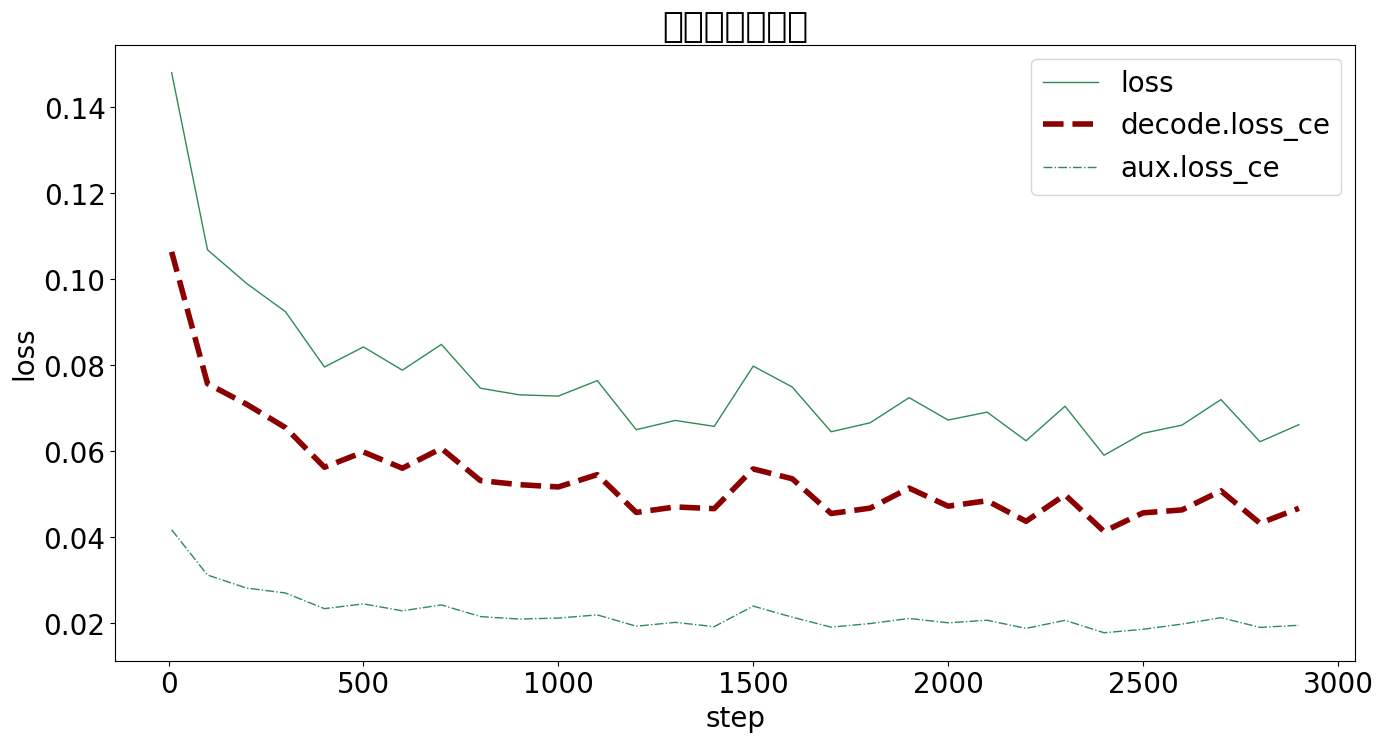

In [15]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率

In [19]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'decode.loss_ce', 'decode.acc_seg',
       'aux.loss_ce', 'aux.acc_seg', 'time', 'memory', 'step'],
      dtype='object')

In [20]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

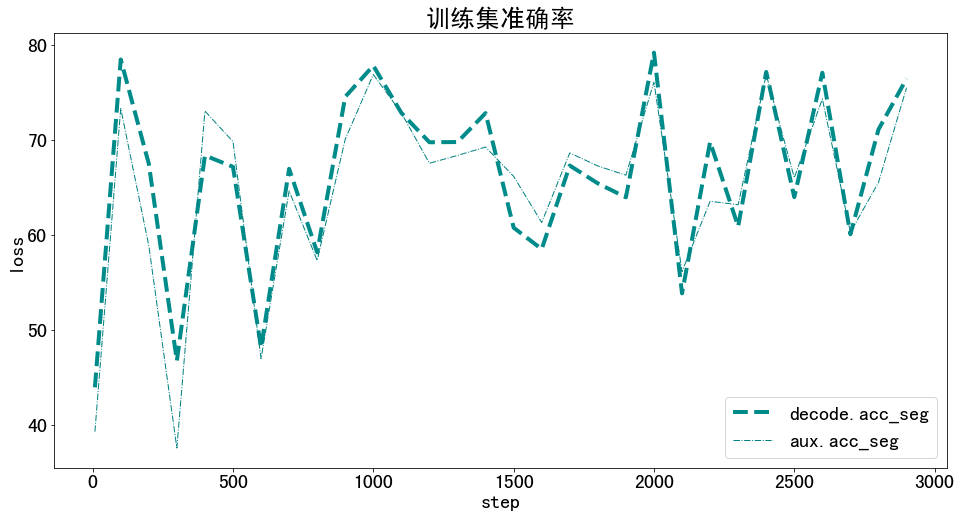

In [21]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标

In [22]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'data_time', 'time', 'step'], dtype='object')

In [23]:
metrics = ['aAcc', 'mIoU', 'mAcc']

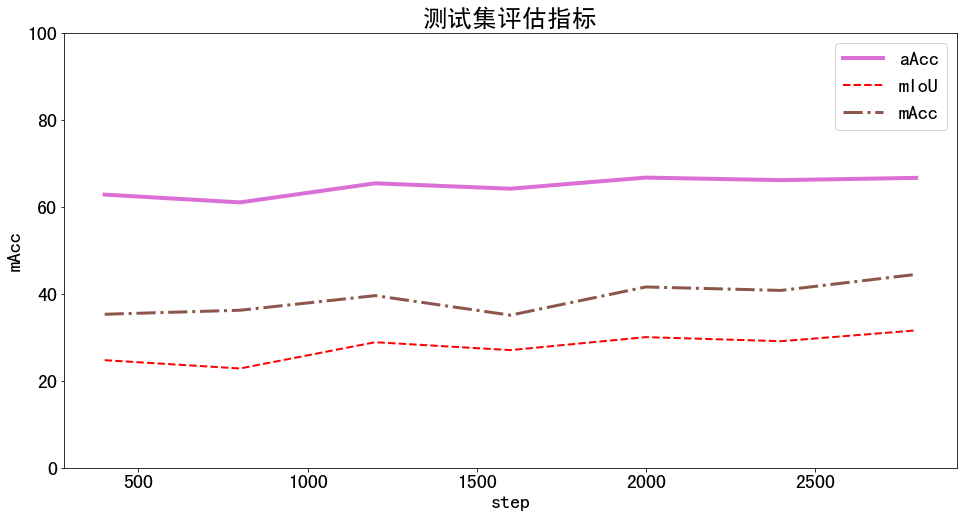

In [24]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()